In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

In [1]:
data = pd.read_csv('/Users/vjsamuel/pywork/kmeans/cars.csv')
kmeans_data = data.fillna(0)
kmeans_data.head(5)

NameError: name 'pd' is not defined

In [36]:
kmeans_data.brand = pd.Categorical(kmeans_data.brand)
kmeans_data['brand_code'] = kmeans_data.brand.cat.codes

In [83]:
kmeans_data[:10]
#kmeans_data.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,brand_code
0,14.0,8,350.0,165,4209.0,12,1972,US.,2
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,0
2,17.0,8,302.0,140,3449.0,11,1971,US.,2
3,15.0,8,400.0,150,3761.0,10,1971,US.,2
4,30.5,4,98.0,63,2051.0,17,1978,US.,2
5,23.0,8,350.0,125,3900.0,17,1980,US.,2
6,13.0,8,351.0,158,4363.0,13,1974,US.,2
7,14.0,8,440.0,215,4312.0,9,1971,US.,2
8,25.4,5,183.0,77,3530.0,20,1980,Europe.,0
9,37.7,4,89.0,62,2050.0,17,1982,Japan.,1


In [126]:
kmeans_data.keys()
#kmeans_data.brand.cat.categories

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand', 'brand_code'],
      dtype='object')

In [143]:
columns = ['hp', 'time-to-60', 'brand_code', 'cubicinches']
features_2 = kmeans_data[columns]
features_2.head(8)

,hp,time-to-60,brand_code,cubicinches
0,165,12,2,350.0
1,71,14,0,89.0
2,140,11,2,302.0
3,150,10,2,400.0
4,63,17,2,98.0
5,125,17,2,350.0
6,158,13,2,351.0
7,215,9,2,440.0


In [2]:
def do_kmeans(X, num_cluster):
    model = KMeans(n_clusters=num_cluster)
    model.fit(X)
    return model
    kmeans_model = do_kmeans(features_2, 6)

In [3]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(features_2)
pl.plot(Nc,score)

NameError: name 'features_2' is not defined

In [146]:
data_labels = kmeans_model.predict(features_2)
collections.Counter(data_labels)

Counter({3: 29, 0: 88, 4: 30, 1: 14, 5: 55, 2: 45})

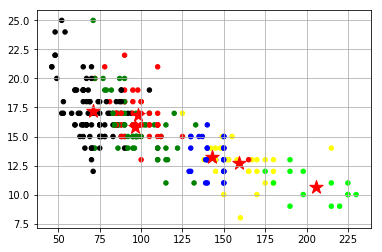

In [147]:
color_map=['black', 'lime', 'red', 'yellow', 'blue', 'green']
plt.scatter(features_2.iloc[:, 0], features_2.iloc[:, 1], c=data_labels, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=200,marker='*',c='red',label='centroids')
plt.grid()
plt.show()

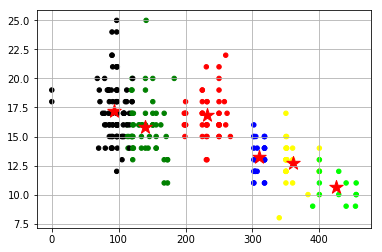

In [148]:
color_map=['black', 'lime', 'red', 'yellow', 'blue', 'green']
plt.scatter(features_2.iloc[:, 3], features_2.iloc[:, 1], c=data_labels, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,3],kmeans_model.cluster_centers_[:,1],s=200,marker='*',c='red',label='centroids')
plt.grid()
plt.show()


In [173]:
features_2.iloc[:,]

,hp,time-to-60,brand_code,cubicinches
0,165,12,2,350.0
1,71,14,0,89.0
2,140,11,2,302.0
3,150,10,2,400.0
4,63,17,2,98.0
5,125,17,2,350.0
6,158,13,2,351.0
7,215,9,2,440.0
8,77,20,0,183.0
9,62,17,1,89.0


In [174]:
kmeans_data.keys()

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand', 'brand_code'],
      dtype='object')

In [175]:
col = ['mpg', 'time-to-60', 'brand_code', 'cylinders']
features_3 = kmeans_data[col]
features_3.head(8)

,mpg,time-to-60,brand_code,cylinders
0,14.0,12,2,8
1,31.9,14,0,4
2,17.0,11,2,8
3,15.0,10,2,8
4,30.5,17,2,4
5,23.0,17,2,8
6,13.0,13,2,8
7,14.0,9,2,8


In [176]:
def do_kmeans(X, num_cluster):
    model2 = KMeans(n_clusters=num_cluster)
    model2.fit(X)
    return model2
    kmeans_model2 = do_kmeans(features_3, 6)
    kmeans_model2

0
1
2
3
4
5
6
7
8


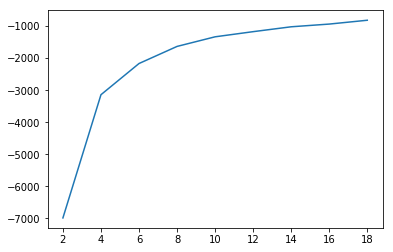

In [177]:
def optimal_clusters(df2):
    Nc2 = range(2, 20, 2)
    data_km2 = df2.values
    kmeans = [KMeans(n_clusters=i) for i in Nc2]
    score = []
    for j in range(len(kmeans)):
        print(j)
        score.append(kmeans[j].fit(data_km2).score(data_km2))
    return Nc2, score
#Nc, score = optimal_clusters(df_kmeans)
Nc2, score = optimal_clusters(features_3)
pl.plot(Nc2,score)

In [178]:
data_labels2 = kmeans_model.predict(features_3)
collections.Counter(data_labels2)

Counter({0: 261})

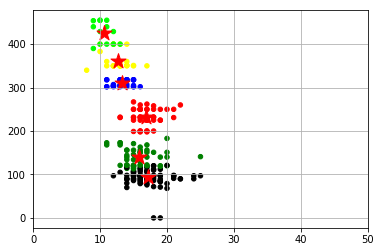

In [179]:
color_map=['black', 'lime', 'red', 'yellow', 'blue', 'green']
plt.scatter(features_3.iloc[:, 1], features_2.iloc[:, 3], c=data_labels, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:, 1],kmeans_model.cluster_centers_[:, 3],s=250,marker='*',c='red',label='centroids')
plt.xlim(0,50)
plt.grid()
plt.show()

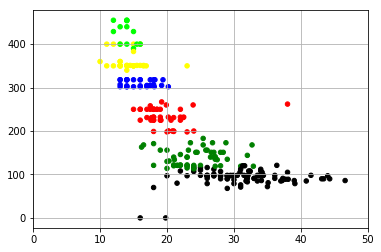

In [180]:
color_map=['black', 'lime', 'red', 'yellow', 'blue', 'green']
plt.scatter(features_3.iloc[:, 0], features_2.iloc[:, 3], c=data_labels, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:, 0],kmeans_model.cluster_centers_[:, 3],s=250,marker='*',c='red',label='centroids')
plt.xlim(0,50)
plt.grid()
plt.show()